In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import datetime

In [2]:
# 1. Create an adjacency matrix for the given graph.
vertices =[1,2,3,4,5,6,7,8,9,10]
edges =[(2,1),(3,1),(7,2),(7,3),(7,6),(8,6),(8,4),(10,8),(10,9),(9,4),(5,3),(5,4)]
num_vertices = len(vertices)
adj_matrix = [[0]* num_vertices for _ in range(num_vertices)]
for edge in edges:
  source,dest = edge
  source_idx = vertices.index(source)
  dest_idx = vertices.index(dest)
  adj_matrix[source_idx][dest_idx] = 1
  adj_matrix[dest_idx][source_idx]= 0
for row in adj_matrix:
  print(row)

adj_list = {vertex:[] for vertex in vertices}
for edge in edges:
  source , dest =edge
  adj_list[source].append(dest)
  adj_list[dest].append(source)

for vertex, neighbors in adj_list.items():
      print(f'{vertex}:{neighbors}' )

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
1:[2, 3]
2:[1, 7]
3:[1, 7, 5]
4:[8, 9, 5]
5:[3, 4]
6:[7, 8]
7:[2, 3, 6]
8:[6, 4, 10]
9:[10, 4]
10:[8, 9]


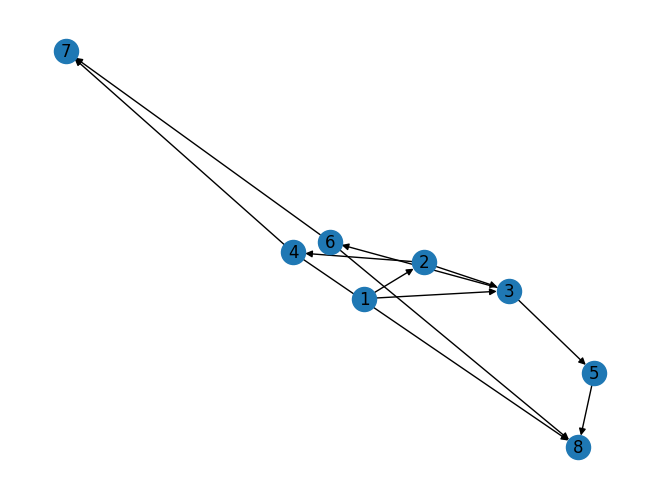

In [3]:
# 2(a). Create a graph from the adjacency matrix
N =[1,2,3,4,5,6,7,8]
E =[(1,2),(1,3),(2,3),(2,4),(3,5),(3,6),(4,7),(4,8),(5,8),(6,7),(6,8)]

G = nx.DiGraph()
G.add_nodes_from(N)
G.add_edges_from(E)
nx.draw( G, with_labels =True)


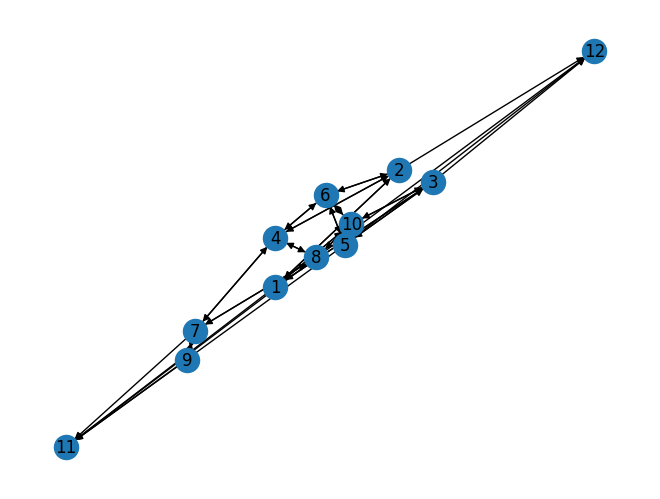

In [4]:
#2(b) Given below is an adjacency matrix for a complex network; create a graph and try to interpret the graph.
N =[1,2,3,4,5,6,7,8, 9,10,11,12]
E =[(1,2),(1,3),(1,10),(1,11),(2,1),(2,4),(2,6),(2,12),(3,1),(3,5),(3,10),(3,12),(4,2),(4,6),(4,7),(4,8),(5,3),(5,6),(5,11),(5,12),(6,2),(6,4),(6,5),(6,10),(7,4),(7,8),(7,9),(7,11),(8,4),(8,7),(8,10),(8,11),(8,12),(9,7),(9,11),(10,1),(10,3),(10,6),(10,8)]

G = nx.DiGraph()
G.add_nodes_from(N)
G.add_edges_from(E)
nx.draw( G, with_labels =True)

**Scenario A: Creating DataFrames**

1. You are given above the travel and departure times for each type of train on each network link. Identify
the Arrival Time for the above trains. Also, create a dataframe using the above data for Arrival and
Departure with the row as From-station and the column as To-station.
2. Execute a code to create an Arrival-Departure Board for all the nodes based on the above-given data
set.
Note 1
: While creating dataframe for Arrival-Departure Board each train must be named for identification. For more details, refer to the footnote given below.

In [5]:
# total travel toime
time = np.array([[0, 0, ['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'], 0],[0, 0, ['16:25', '19:38', '20:56', '09:13', '12:08'], 0],[['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'],  ['16:25', '19:38', '20:56', '09:13', '12:08'],0,['03:42', '02:56', '04:15', '03:18', '05:08', '03:50']],[0, 0, ['03:42', '02:56', '04:15', '03:18', '05:08', '03:50'], 0]])

tt_time = pd.DataFrame(time, index=['S1', 'S2', 'M1', 'C1'], columns=['S1', 'S2', 'M1', 'C1'])


<ipython-input-5-cf8db8155b4a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  time = np.array([[0, 0, ['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'], 0],[0, 0, ['16:25', '19:38', '20:56', '09:13', '12:08'], 0],[['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'],  ['16:25', '19:38', '20:56', '09:13', '12:08'],0,['03:42', '02:56', '04:15', '03:18', '05:08', '03:50']],[0, 0, ['03:42', '02:56', '04:15', '03:18', '05:08', '03:50'], 0]])


In [6]:
tt_time

S1  \
S1                                                  0   
S2                                                  0   
M1  [18:35, 21:27, 19:46, 26:25, 28:36, 20:28, 32:...   
C1                                                  0   

                                     S2  \
S1                                    0   
S2                                    0   
M1  [16:25, 19:38, 20:56, 09:13, 12:08]   
C1                                    0   

                                                   M1  \
S1  [18:35, 21:27, 19:46, 26:25, 28:36, 20:28, 32:...   
S2                [16:25, 19:38, 20:56, 09:13, 12:08]   
M1                                                  0   
C1         [03:42, 02:56, 04:15, 03:18, 05:08, 03:50]   

                                            C1  
S1                                           0  
S2                                           0  
M1  [03:42, 02:56, 04:15, 03:18, 05:08, 03:50]  
C1                                           0

In [7]:
# departure time
dep_time = np.array([[0 ,0 , ['16:30', '14:40', '03:55', '01:25', '10:26', '12:25', '06:35', '20:15'] ,0],[0 ,0, ['04:20', '08:35', '12:15', '18:12', '22:18'],0],[['18:25', '06:20', '02:25', '05:15', '09:20', '15:15', '20:18', '22:20'] ,['12:25', '15:16', '18:21', '07:25', '21:20'],0 , ['05:50', '10:25', '12:30', '18:15', '21:05', '16:20']],[0, 0, ['04:00', '07:15', '10:55', '18:35', '21:25', '23:50'] ,0]])
dep = pd.DataFrame(dep_time,index = ['S1', 'S2' ,'M1' ,'C1'],columns =['S1', 'S2','M1','C1'])


<ipython-input-7-cd2e307ba480>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dep_time = np.array([[0 ,0 , ['16:30', '14:40', '03:55', '01:25', '10:26', '12:25', '06:35', '20:15'] ,0],[0 ,0, ['04:20', '08:35', '12:15', '18:12', '22:18'],0],[['18:25', '06:20', '02:25', '05:15', '09:20', '15:15', '20:18', '22:20'] ,['12:25', '15:16', '18:21', '07:25', '21:20'],0 , ['05:50', '10:25', '12:30', '18:15', '21:05', '16:20']],[0, 0, ['04:00', '07:15', '10:55', '18:35', '21:25', '23:50'] ,0]])


In [8]:
dep

S1  \
S1                                                  0   
S2                                                  0   
M1  [18:25, 06:20, 02:25, 05:15, 09:20, 15:15, 20:...   
C1                                                  0   

                                     S2  \
S1                                    0   
S2                                    0   
M1  [12:25, 15:16, 18:21, 07:25, 21:20]   
C1                                    0   

                                                   M1  \
S1  [16:30, 14:40, 03:55, 01:25, 10:26, 12:25, 06:...   
S2                [04:20, 08:35, 12:15, 18:12, 22:18]   
M1                                                  0   
C1         [04:00, 07:15, 10:55, 18:35, 21:25, 23:50]   

                                            C1  
S1                                           0  
S2                                           0  
M1  [05:50, 10:25, 12:30, 18:15, 21:05, 16:20]  
C1                                           0

In [9]:
s=[]
w=[]
for i in range(4):
 # for j in range(4):
    s.append(dep.iloc[0:,i])
    w.append(tt_time.iloc[0:,i])

In [10]:

from datetime import datetime, timedelta

total_time = timedelta()
arrival_times = []
# Iterate through the data and calculate arrival times
for i in range(len(tt_time.index)):
    for j in range(len(tt_time.columns)):
        list_new =[]
        if tt_time.iloc[i, j] != 0:
            departure_times = dep.iloc[i, j]
            travel_times = tt_time.iloc[i, j]

            for dep_time, travel_time in zip(departure_times, travel_times):
               hours, minutes = map(int, travel_time.split(':'))
               hour, minute = map(int, dep_time.split(':'))
               time_delta = timedelta(hours=hours, minutes=minutes)
               time_delta1 = timedelta(hours=hour, minutes=minute)
               total_time=time_delta1+time_delta
               TT = str(total_time).split(", ")[-1]  # Get the part of the string after the last comma
               TT=TT[:-3]
               list_new.append(str(TT))
            arrival_times.append(list_new)


print(arrival_times)


[['11:05', '12:07', '23:41', '3:50', '15:02', '8:53', '14:51', '18:25'], ['20:45', '4:13', '9:11', '3:25', '10:26'], ['13:00', '3:47', '22:11', '7:40', '13:56', '11:43', '4:34', '20:30'], ['4:50', '10:54', '15:17', '16:38', '9:28'], ['9:32', '13:21', '16:45', '21:33', '2:13', '20:10'], ['7:42', '10:11', '15:10', '21:53', '2:33', '3:40']]


In [11]:
import pandas as pd
from datetime import timedelta

# Your code to calculate arrival times
total_time = timedelta()
arrival_times = []

for i in range(len(tt_time.index)):
    for j in range(len(tt_time.columns)):
        list_new = []
        if tt_time.iloc[i, j] != 0:
            departure_times = dep.iloc[i, j]
            travel_times = tt_time.iloc[i, j]
            for dep_time, travel_time in zip(departure_times, travel_times):
                hours, minutes = map(int, travel_time.split(':'))
                hour, minute = map(int, dep_time.split(':'))
                time_delta = timedelta(hours=hours, minutes=minutes)
                time_delta1 = timedelta(hours=hour, minutes=minute)
                total_time = time_delta1 + time_delta
                TT = str(total_time).split(", ")[-1]  # Get the part of the string after the last comma
                TT = TT[:-3]
                list_new.append(str(TT))
            arrival_times.append(list_new)


In [12]:
arrival_times

[['11:05', '12:07', '23:41', '3:50', '15:02', '8:53', '14:51', '18:25'],
 ['20:45', '4:13', '9:11', '3:25', '10:26'],
 ['13:00', '3:47', '22:11', '7:40', '13:56', '11:43', '4:34', '20:30'],
 ['4:50', '10:54', '15:17', '16:38', '9:28'],
 ['9:32', '13:21', '16:45', '21:33', '2:13', '20:10'],
 ['7:42', '10:11', '15:10', '21:53', '2:33', '3:40']]

In [13]:
st = np.array([[0,0,['11:05', '12:07', '23:41', '3:50', '15:02', '8:53', '14:51', '18:25'],0],
               [0,0,['20:45', '4:13', '9:11', '3:25', '10:26'],0],
               [['13:00', '3:47', '22:11', '7:40', '13:56', '11:43', '4:34', '20:30'], ['4:50', '10:54', '15:17', '16:38', '9:28'],0,['9:32', '13:21', '16:45', '21:33', '2:13', '20:10']],
               [0,0, ['7:42', '10:11', '15:10', '21:53', '2:33', '3:40'],0]])

<ipython-input-13-bc5fe0b8ae08>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  st = np.array([[0,0,['11:05', '12:07', '23:41', '3:50', '15:02', '8:53', '14:51', '18:25'],0],


In [14]:

from_stations = tt_time.index
to_stations = tt_time.columns

arrival_df = pd.DataFrame(st, index=from_stations, columns=to_stations)
departure_df = dep

print("Arrival Times:")
print(arrival_df)

print("\nDeparture Times:")
print(departure_df)


Arrival Times:
                                                   S1  \
S1                                                  0   
S2                                                  0   
M1  [13:00, 3:47, 22:11, 7:40, 13:56, 11:43, 4:34,...   
C1                                                  0   

                                   S2  \
S1                                  0   
S2                                  0   
M1  [4:50, 10:54, 15:17, 16:38, 9:28]   
C1                                  0   

                                                   M1  \
S1  [11:05, 12:07, 23:41, 3:50, 15:02, 8:53, 14:51...   
S2                   [20:45, 4:13, 9:11, 3:25, 10:26]   
M1                                                  0   
C1            [7:42, 10:11, 15:10, 21:53, 2:33, 3:40]   

                                          C1  
S1                                         0  
S2                                         0  
M1  [9:32, 13:21, 16:45, 21:33, 2:13, 20:10]  
C1                 

In [15]:
S1=np.array([0,0,0,0])
S2=np.array([0,0,0,0])
M1=np.array([0,0,0,0])
C1=np.array([0,0,0,0])
arr=pd.DataFrame(zip(S1,S2,M1,C1),index=['S1','S2','M1','C1'],columns=['S1','S2','M1','C1'])



pd.set_option('max_colwidth', 60)
arr
arr['M1']['S1']= arrival_times[0]
arr['S1']['M1']= arrival_times[2]
arr['M1']['S2']= arrival_times[1]
arr['S2']['M1']= arrival_times[3]
arr['M1']['C1']= arrival_times[5]
arr['C1']['M1']= arrival_times[4]
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.colheader_justify','center')
arr


<ipython-input-15-3cc97d8bae10>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr['S1']['M1']= arrival_times[2]
<ipython-input-15-3cc97d8bae10>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr['S2']['M1']= arrival_times[3]
<ipython-input-15-3cc97d8bae10>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr['C1']['M1']= arrival_times[4]


S1                            \
S1                                                      0   
S2                                                      0   
M1  [13:00, 3:47, 22:11, 7:40, 13:56, 11:43, 4:34, 20:30]   
C1                                                      0   

                   S2                  \
S1                                  0   
S2                                  0   
M1  [4:50, 10:54, 15:17, 16:38, 9:28]   
C1                                  0   

                              M1                            \
S1  [11:05, 12:07, 23:41, 3:50, 15:02, 8:53, 14:51, 18:25]   
S2                        [20:45, 4:13, 9:11, 3:25, 10:26]   
M1                                                       0   
C1                 [7:42, 10:11, 15:10, 21:53, 2:33, 3:40]   

                       C1                     
S1                                         0  
S2                                         0  
M1  [9:32, 13:21, 16:45, 21:33, 2:13, 20:10]  
C1                                         0

In [16]:
dep

S1                             \
S1                                                         0   
S2                                                         0   
M1  [18:25, 06:20, 02:25, 05:15, 09:20, 15:15, 20:18, 22:20]   
C1                                                         0   

                    S2                   \
S1                                    0   
S2                                    0   
M1  [12:25, 15:16, 18:21, 07:25, 21:20]   
C1                                    0   

                               M1                             \
S1  [16:30, 14:40, 03:55, 01:25, 10:26, 12:25, 06:35, 20:15]   
S2                       [04:20, 08:35, 12:15, 18:12, 22:18]   
M1                                                         0   
C1                [04:00, 07:15, 10:55, 18:35, 21:25, 23:50]   

                        C1                      
S1                                           0  
S2                                           0  
M1  [05:50, 10:25, 12:30, 18:15, 21:05, 16:20]  
C1                                           0

In [17]:
def timeconvert(t):
  a, b = map(int, list(t.split(':')))
  timeinminutes = a*60 + b
  return timeinminutes


In [18]:
board = []

def createtitle(d, a, i, j):
  return d+'_'+ind[i]+ind[j]+'_'+a

for i in range(4):
  for j in range(4):
    if dep[i][j] != None:
      for k in range(F[i][j]):
        title = createtitle(dep[i][j][k], arr[i][j][k], i, j)
        board.append(title)

for line in board:
  print(line)

KeyError: ignored

**Scenario B: Scheduling Intersection**

Note 2
: While providing an output of a feasible itinerary, you need to use an approach similar to the
elementary set theory; for more details, refer to the footnote below.
1. A layover in our context significantly differs from the waiting time at the meeting point. Layover
is when both parties come separately and wait for the next leg of the journey. At the same time,
waiting time here refers to either of the parties reaching early at the meeting point and waiting for the
other party. Create a plot for feasible trains arriving at the meeting point M1 arriving from {S1, S2}
against the possible number of feasible departures for C1 with a minimum layover time {1, 2, 5} hours.
Describe your obtained plot based on your understanding. Also, report your feasible travel plan using
the prescribed notation.
2. Assume that your tour planning is now constrained by waiting time at meeting point M1 say, waiting
time not more {1.5, 2.5} hours. You can continue to assume a minimum layover time of {1, 2, 5} hours.
Plot your feasible set of trains from the source nodes {S1, S2} against departing trains at M1 to C1
with required layovers and waiting time. Describe your obtained plot based on your understanding.
Also, report your feasible travel plan using the prescribed notation.
Hint: Try to use a heatmap as a plot!!!

In [19]:
DEP_S1_M1 = np.array([['16:30', '14:40', '03:55', '01:25', '10:26', '12:25', '06:35', '20:15'],      # S1 to M1:
                                  ['18:25', '06:20', '02:25', '05:15', '09:20', '15:15', '20:18', '22:20']])     # M1 to S1:

DEP_S2_M1 = np.array([['4:20', '08:35', '12:15', '18:12', '22:18'],
                                  ['12:25', '15:16', '18:21', '07:25', '21:20']])

DEP_M1_C1 = np.array([['05:50', '10:25', '12:30', '18:15', '21:05', '16:20'],
                                  ['04:00', '07:15', '10:55', '18:35', '21:25', '23:50']])

#Total Time(TT)
TT_matrix = np.array([['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'],
                               ['16:25', '19:38', '20:56', '09:13', '12:08'],
                               ['03:42', '02:56', '04:15', '03:18', '05:08', '03:50']])


<ipython-input-19-cab775a10bf5>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  TT_matrix = np.array([['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'],


In [20]:
# Converting Time into Same unit(min.)
def time_to_mins(time_str):
  hr, mins = [int(i) for i in time_str.split(':')]
  return (hr*60) + mins

def mins_to_time(mins):
  mins = mins % (24*60)
  hr = mins//60
  min = mins % 60
  return f'{hr:02d}:{min:02d}'

def arrival_time(dp_time, tt):
  arr_time = time_to_mins(dp_time) + time_to_mins(tt)
  return arr_time

In [21]:
# Converting Time into Same unit(min.)
def time_to_mins(time_str):
  hr, mins = [int(i) for i in time_str.split(':')]
  return (hr*60) + mins

def mins_to_time(mins):
  mins = mins % (24*60)
  hr = mins//60
  min = mins % 60
  return f'{hr:02d}:{min:02d}'

def arrival_time(dp_time, tt):
  arr_time = time_to_mins(dp_time) + time_to_mins(tt)
  return arr_time

In [22]:
df = pd.DataFrame({'Train Num': [],
                   'Departure Time (24 Hr)': [],
                   'Origin Node': [],
                   'Destination Node': [],
                   'Arrival Time (24 Hr)': [],
                   'Departure Time (Min)': [],
                   'Arrival Time (Min)': []})

In [27]:
df

Empty DataFrame
Columns: [Train Num, Departure Time (24 Hr), Origin Node, Destination Node, Arrival Time (24 Hr), Departure Time (Min), Arrival Time (Min)]
Index: []

In [24]:
t1 = df[df['Origin Node'] == 'S1']
t2 = df[(df['Origin Node'] == 'M1') & (df['Destination Node'] == 'C1')]

layover_times_S1_M1 = {}

for ti_S1_M1 in range(len(t1)): # loop for each train: S1 --> M1

  # arrival time for train i at M1
  at_min_ti = time_to_mins(t1.iloc[ti_S1_M1]['Arrival Time (24 Hr)'])
  # layover time for train i at M1 wrt each train going M1 --> C1
  layover_ti = [t - at_min_ti if t > at_min_ti else 1440 - at_min_ti + t for t in t2['Departure Time (Min)']]

  train_name = t1.iloc[ti_S1_M1]['Train Num']
  layover_times_S1_M1[train_name] = layover_ti

layover_times_S1_M1_df = pd.DataFrame(layover_times_S1_M1, index = t2['Train Num'].values).T

In [25]:
sns.heatmap(layover_times_S1_M1_df/60, cmap = sns.color_palette("coolwarm", 10), annot=True, cbar_kws={'label': 'Layover Time (Hr)'})

plt.xlabel('Trains: M1 --> C1')
plt.ylabel('Trains: S1 --> M1')
plt.title('Layover Time for S1')

plt.savefig('./B1_layover_S1.png', dpi = 500, bbox_inches='tight')

plt.show()

ValueError: ignored

In [ ]:
t1 = df[df['Origin Node'] == 'S2']
t2 = df[(df['Origin Node'] == 'M1') & (df['Destination Node'] == 'C1')]

layover_times_S2_M1 = {}

for ti_S2_M1 in range(len(t1)): # loop for each train: S2 --> M1

  # arrival time for train i at M1
  at_min_ti = time_to_mins(t1.iloc[ti_S2_M1]['Arrival Time (24 Hr)'])
  # layover time for train i at M1 wrt each train going M1 --> C1
  layover_ti = [t - at_min_ti if t > at_min_ti else 1440 - at_min_ti + t for t in t2['Departure Time (Min)']]

  train_name = t1.iloc[ti_S2_M1]['Train Num']
  layover_times_S2_M1[train_name] = layover_ti

layover_times_S2_M1_df = pd.DataFrame(layover_times_S2_M1, index = t2['Train Num'].values).T

In [28]:
layover_times_S2_M1_df


NameError: ignored

In [29]:
sns.heatmap(layover_times_S2_M1_df)

NameError: ignored

In [30]:
sns.heatmap(layover_times_S2_M1_df/60, cmap = sns.color_palette("coolwarm", 10), annot=True, cbar_kws={'label': 'Layover Time (Hr)'})

plt.xlabel('Trains: M1 --> C1')
plt.ylabel('Trains: S2 --> M1')
plt.title('Layover Time for S2')

plt.savefig('./B1_layover_S2.png', dpi = 500, bbox_inches='tight')

plt.show()

NameError: ignored

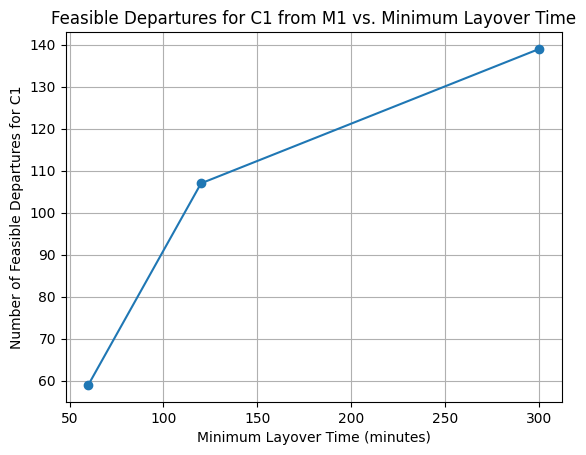

Feasible Travel Plans:
Plan 1: S1 -> M1: 665 minutes, S2 -> M1: 1245 minutes, M1 -> C1: 1313 minutes
Plan 2: S1 -> M1: 665 minutes, S2 -> M1: 253 minutes, M1 -> C1: 910 minutes
Plan 3: S1 -> M1: 665 minutes, S2 -> M1: 253 minutes, M1 -> C1: 1313 minutes
Plan 4: S1 -> M1: 665 minutes, S2 -> M1: 551 minutes, M1 -> C1: 910 minutes
Plan 5: S1 -> M1: 665 minutes, S2 -> M1: 551 minutes, M1 -> C1: 1313 minutes
Plan 6: S1 -> M1: 665 minutes, S2 -> M1: 205 minutes, M1 -> C1: 910 minutes
Plan 7: S1 -> M1: 665 minutes, S2 -> M1: 205 minutes, M1 -> C1: 1313 minutes
Plan 8: S1 -> M1: 665 minutes, S2 -> M1: 626 minutes, M1 -> C1: 910 minutes
Plan 9: S1 -> M1: 665 minutes, S2 -> M1: 626 minutes, M1 -> C1: 1313 minutes
Plan 10: S1 -> M1: 727 minutes, S2 -> M1: 1245 minutes, M1 -> C1: 1313 minutes
Plan 11: S1 -> M1: 727 minutes, S2 -> M1: 253 minutes, M1 -> C1: 910 minutes
Plan 12: S1 -> M1: 727 minutes, S2 -> M1: 253 minutes, M1 -> C1: 1313 minutes
Plan 13: S1 -> M1: 727 minutes, S2 -> M1: 551 minutes

In [31]:
#Scenario B 2(1)

# again make the data frame of arrival time
arrival_times2 = pd.DataFrame({
                               'S1': [0, 0, ['11:05', '12:07', '23:41', '3:50', '15:02', '8:53', '14:51', '18:25'], 0],
                               'S2': [0, 0, ['20:45', '4:13', '9:11', '3:25', '10:26'], 0],
                               'M1': [['13:00', '3:47', '22:11', '7:40', '13:56', '11:43', '4:34', '20:30'],
                                      ['4:50', '10:54', '15:17', '16:38', '9:28'], 0, ['9:32', '13:21', '16:45', '21:33', '2:13', '20:10']],
                               'C1': [0, 0, ['7:42', '10:11', '15:10', '21:53', '2:33', '3:40'], 0]
                               }, index=['S1', 'S2', 'M1', 'C1'], columns=['S1', 'S2', 'M1', 'C1'])


arrival_times2 = arrival_times2.applymap(lambda x: [int(t.split(':')[0]) * 60 + int(t.split(':')[1]) for t in x] if isinstance(x, list) else x)

# set the given  the layover times 1h , 2h , 5h
min_layover_times = [60, 120, 300]

# make the value and store
feasible_combinations = []
num_feasible_departures = []

# Calculate feasible travel plans
for min_layover_time in min_layover_times:
    for arr_s1 in arrival_times2['S1']['M1']:
        for arr_s2 in arrival_times2['S2']['M1']:
            for departure_C1 in arrival_times2['C1']['M1']:
                if arr_s1 <= departure_C1 - min_layover_time and arr_s2 <= departure_C1 - min_layover_time:
                    feasible_combinations.append((arr_s1, arr_s2, departure_C1))

    num_feasible_departures.append(len(feasible_combinations))

# Plot the feasible combinations  and make the simple plot
plt.plot(min_layover_times, num_feasible_departures, marker='o')
plt.xlabel("Minimum Layover Time (minutes)")
plt.ylabel("Number of Feasible Departures for C1")
plt.title("Feasible Departures for C1 from M1 vs. Minimum Layover Time")
plt.grid(True)
plt.show()

# Print the feasible travel plans
print("Feasible Travel Plans:")
for i, (arr_s1, arr_s2, departure_C1) in enumerate(feasible_combinations):
    print(f"Plan {i+1}: S1 -> M1: {arr_s1} minutes, S2 -> M1: {arr_s2} minutes, M1 -> C1: {departure_C1} minutes")


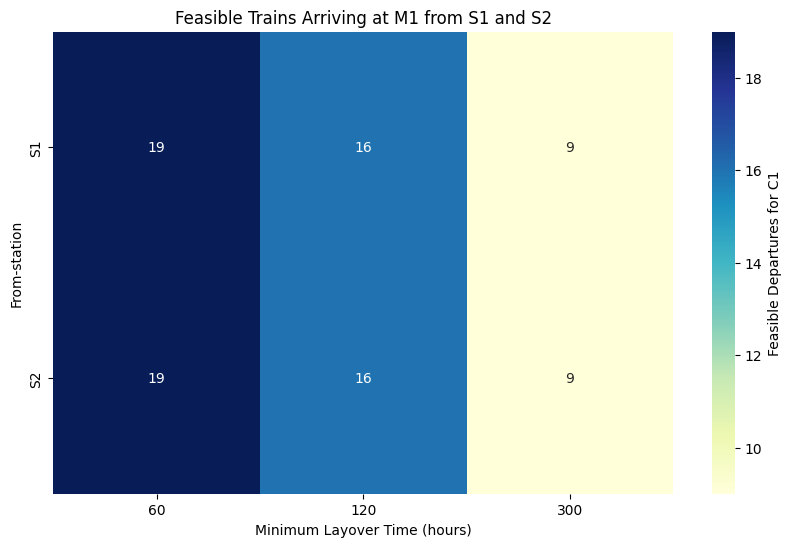

In [32]:
# answer2(1)   in the above code give the simple plot and pridiction and here we make  the only heat map plot


arrival_times2 = pd.DataFrame({
                                'S1': [0, 0, ['11:05', '12:07', '23:41', '3:50', '15:02', '8:53', '14:51', '18:25'], 0],
                                'S2': [0, 0, ['20:45', '4:13', '9:11', '3:25', '10:26'], 0],
                                'M1': [['13:00', '3:47', '22:11', '7:40', '13:56', '11:43', '4:34', '20:30'],
                                       ['4:50', '10:54', '15:17', '16:38', '9:28'], 0,
                                       ['9:32', '13:21', '16:45', '21:33', '2:13', '20:10']],
                                'C1': [0, 0, ['7:42', '10:11', '15:10', '21:53', '2:33', '3:40'], 0]
                               }, index=['S1', 'S2', 'M1', 'C1'])

# set the given  the layover times 1h , 2h , 5h
layover_times = [60, 120, 300]

# Initialize an empty DataFrame for the heatmap
heatmap_data = pd.DataFrame(index=['S1', 'S2'], columns=layover_times)

# Iterate through the layover times and calculate the number of feasible departures for C1
for layover_time in layover_times:
    feasible_departures = 0
    for i in range(len(arrival_times2['M1']['S1'])):
        for j in range(len(arrival_times2['M1']['S2'])):
            arrival_S1 = pd.to_datetime(arrival_times2['M1']['S1'][i])
            arrival_S2 = pd.to_datetime(arrival_times2['M1']['S2'][j])
            if arrival_S1 < arrival_S2:
                layover = arrival_S2 - arrival_S1
                if layover.total_seconds() >= layover_time * 60:
                    feasible_departures += 1
    heatmap_data[layover_time] = feasible_departures

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Feasible Departures for C1'})
plt.title('Feasible Trains Arriving at M1 from S1 and S2')
plt.xlabel('Minimum Layover Time (hours)')
plt.ylabel('From-station')
plt.show()


In [35]:

def maximumtime(t1, t2):
  s1 = timeconvert(t1)
  s2 = timeconvert(t2)
  if s2 >= s1:
    return t2
  else: return t1

feasibletrains = []

for s1trainno,s1trainarr in enumerate(arr.loc['S1', 'M1']):
  for s2trainno, s2trainarr in enumerate(arr.loc['S2', 'M1']):
    if maximumtime(s1trainarr, s2trainarr) == s1trainarr:
      moveovertime = timeconvert(reconvert(timeconvert(s1trainarr)+60))
      for m1trainno, m1traindep in enumerate(dep.loc['M1', 'C1']):
        if timeconvert(m1traindep) > moveovertime:
          feasibletrains.append([s1trainno, s2trainno, m1trainno])
    else:
      moveovertime = timeconvert(reconvert(timeconvert(s2trainarr)+60))
      for m1trainno, m1traindep in enumerate(dep.loc['M1', 'C1']):
        if timeconvert(m1traindep) > moveovertime:
          feasibletrains.append([s1trainno, s2trainno, m1trainno])

feasibles = []
prev0, prev1, prev2 = feasibletrains[0]
sublist = [prev2]
for a,b,c in feasibletrains[1:]:
  if (a==prev0) and (b==prev1):
    sublist.append(c)
  else:
    feasibles.append([prev0, prev1, copy.deepcopy(sublist)])
    sublist.clear()
    sublist.append(c)
  prev0 = a
  prev1 = b
layovertrains  = []
layovertrains.append(len(feasibles))
feasibles

NameError: ignored

**Scenario C:-**

Parting Ways
Assuming both passengers board the same train from C1 to return to their destinations for {S1, S2}, but
at M1 they part their respective ways. A layover for both passengers can be expected on return as well,
followed by a waiting time for passenger departing later from M1. In this scenario, a layover can be computed
as the time between the arrival of a train at M1 from C1 and the time of the first passenger departure.
Following layover time, a waiting time for other passenger starts, considering a maximum waiting time of
{1, 2, 4, 10, 15} hours for the other passenger at M1 can be expected. Based on the given waiting time for the
second passenger, plot the combination for feasible Out-bound trains from M1 to {S1, S2} against Inbound
trains from C1 to M1. Also, plot a heatmap(s) with one axis as an arrival from C1 to M1 and the other
axis as a feasible departure from M1 to {S1, S2}.

In [ ]:
arr

In [ ]:
# Function to convert time to minutes
def timeconvert(timestr):
    h, m = map(int, timestr.split(':'))
    return h * 60 + m


In [ ]:
# in this code give the manual value of Feasible Trains for [1,2,4,10,15]hr waiting time:
def timediff(s2dep, s1dep):
    s1 = timeconvert(s1dep)
    s2 = timeconvert(s2dep)
    if s1 is None or s2 is None:
        return None
    if s2 <= s1:
        s2 += 24 * 60
    return s2 - s1

waitingtimes = [60, 120, 4 * 60, 10 * 60, 15 * 60]

for waittime in waitingtimes:
    feasibletrains = []
    for c1trainno, c1trainarr in enumerate(arr.loc['C1', 'M1']):
        for s1trainno, s1traindep in enumerate(dep.loc['M1', 'S1']):
            for s2trainno, s2traindep in enumerate(dep.loc['M1', 'S2']):
                c1_time = timeconvert(c1trainarr)
                s1_time = timeconvert(s1traindep)
                s2_time = timeconvert(s2traindep)
                if c1_time is not None and s1_time is not None and s2_time is not None:
                    if c1_time < s1_time and timediff(s2traindep, s1traindep) is not None and timediff(s2traindep, s1traindep) <= waittime:
                        feasibletrains.append([c1trainno, s1trainno, s2trainno])

    print(f"Feasible Trains for {int(waittime/60)}hr waiting time:")
    for train in feasibletrains:
        c1trainno, s1trainno, s2trainno = train
        print(f"C1 Train {c1trainno} -> M1 Train {s1trainno} -> M1 Train {s2trainno}")

    print()


In [ ]:
# in this code we make the heat map plot
import copy
waitingtimes = [60, 120, 4 * 60, 10 * 60, 15 * 60]

# Initialize an empty matrix to store the counts of feasible train combinations
count_matrix = np.zeros((len(arr.loc['C1', 'M1']), len(dep.loc['M1', 'S1'])))

for waittime in waitingtimes:
    feasibletrains = []
    for c1trainno, c1trainarr in enumerate(arr.loc['C1', 'M1']):
        for s1trainno, s1traindep in enumerate(dep.loc['M1', 'S1']):
            for s2trainno, s2traindep in enumerate(dep.loc['M1', 'S2']):
                c1_time = timeconvert(c1trainarr)
                s1_time = timeconvert(s1traindep)
                s2_time = timeconvert(s2traindep)
                if c1_time is not None and s1_time is not None and s2_time is not None:
                    if c1_time < s1_time and timediff(s2traindep, s1traindep) is not None and timediff(s2traindep, s1traindep) <= waittime:
                        feasibletrains.append([c1trainno, s1trainno, s2trainno])

    feasibles = []
    prev0, prev1, prev2 = feasibletrains[0]
    sublist = [prev2]
    for a, b, c in feasibletrains[1:]:
        if (a == prev0) and (b == prev1):
            sublist.append(c)
        else:
            feasibles.append([prev0, prev1, copy.deepcopy(sublist)])
            sublist.clear()
            sublist.append(c)
        prev0 = a
        prev1 = b

    for a, b, ls in feasibles:
        count_matrix[a][b] = len(ls)

    sns.heatmap(count_matrix, annot=True, cmap='YlGnBu', fmt='g')
    plt.xlabel("Train Number from M1 to S1")
    plt.ylabel('Train Number from C1 to M1')
    plt.title(f"Feasible Trains from M1 to S2 for {int(waittime/60)}hr waiting time")
    plt.show()
